In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import os

In [3]:
df = pd.read_csv(r"C:\Users\M S I\Desktop\project\Superstore.csv", encoding = 'latin1') 
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df_selected = df.groupby('Customer ID').agg({'Sales':'sum','Quantity':'sum','Order ID':'count'}).rename(columns={'Order ID':'OrderCount'}).reset_index()

In [7]:
df_selected.head()

,Customer ID,Sales,Quantity,OrderCount
0,AA-10315,5563.560,30,11
1,AA-10375,1056.390,41,15
2,AA-10480,1790.512,36,12
3,AA-10645,5086.935,64,18
4,AB-10015,886.156,13,6


In [8]:
df_selected.describe()

,Sales,Quantity,OrderCount
count,793.000000,793.000000,793.000000
mean,2896.848500,47.759142,12.602774
std,2628.670117,24.842915,6.242559
min,4.833000,2.000000,1.000000
25%,1146.050000,30.000000,8.000000
50%,2256.394000,44.000000,12.000000
75%,3785.276000,63.000000,16.000000
max,25043.050000,150.000000,37.000000


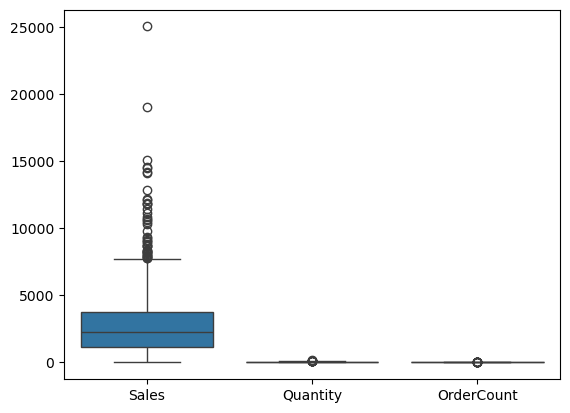

In [9]:
sns.boxplot(data=df_selected[['Sales','Quantity','OrderCount']])
plt.show()

In [10]:
# Removing Sales Outliers and store them sepreately
S_Q1 = df_selected['Sales'].quantile(0.25)
S_Q3 = df_selected['Sales'].quantile(0.75)
S_IQR = S_Q3-S_Q1
sales_outliers = df_selected[(df_selected['Sales'] > (S_Q3 + 1.5 * S_IQR)) | (df_selected['Sales'] < (S_Q1 - 1.5 * S_IQR)) ].copy()
sales_outliers.describe()

,Sales,Quantity,OrderCount
count,43.000000,43.000000,43.000000
mean,10704.986972,74.441860,19.209302
std,3384.488747,26.480273,6.919806
min,7754.976000,26.000000,6.000000
25%,8302.592000,56.500000,14.500000
50%,9351.212000,73.000000,18.000000
75%,11855.935500,92.000000,22.500000
max,25043.050000,143.000000,34.000000


In [11]:
# Quantity outliers
Q_Q1 = df_selected['Quantity'].quantile(0.25)
Q_Q3 = df_selected['Quantity'].quantile(0.75)
Q_IQR = Q_Q3-Q_Q1
quantity_outliers = df_selected[(df_selected['Quantity'] > (Q_Q3 + 1.5 * Q_IQR)) | (df_selected['Quantity'] < (Q_Q1 - 1.5 * Q_IQR)) ].copy()
quantity_outliers.describe()

,Sales,Quantity,OrderCount
count,14.000000,14.000000,14.000000
mean,6321.171307,126.214286,30.857143
std,3306.124113,13.261735,3.393594
min,2580.704000,113.000000,26.000000
25%,3629.919875,114.000000,29.000000
50%,5777.099900,122.000000,31.500000
75%,7521.300000,136.750000,33.500000
max,14175.229000,150.000000,37.000000


In [12]:
non_outliers = df_selected[(~df_selected.index.isin(sales_outliers.index)) & (~df_selected.index.isin(quantity_outliers.index))]
non_outliers.head()

,Customer ID,Sales,Quantity,OrderCount
0,AA-10315,5563.560,30,11
1,AA-10375,1056.390,41,15
2,AA-10480,1790.512,36,12
3,AA-10645,5086.935,64,18
4,AB-10015,886.156,13,6


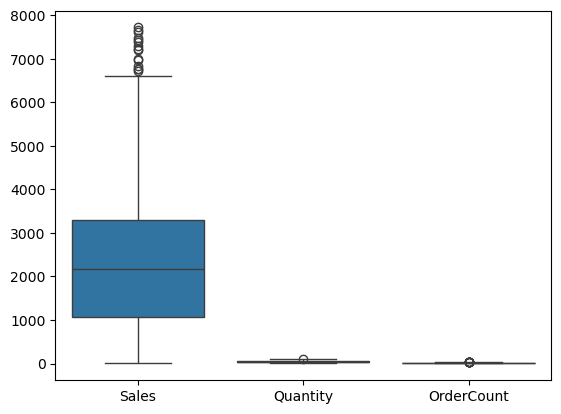

In [13]:
sns.boxplot(data = non_outliers)
plt.show()

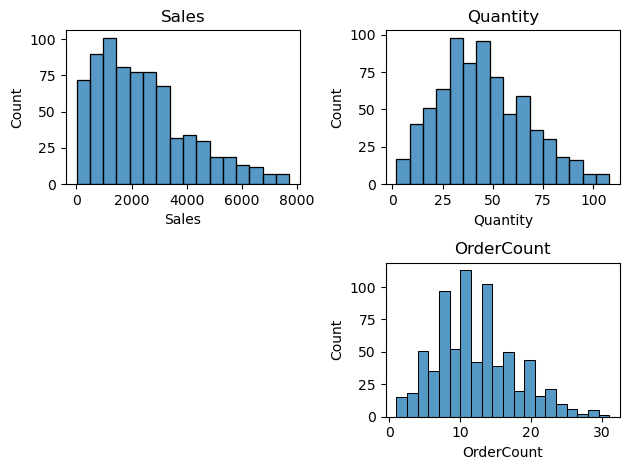

In [14]:
plt.subplot (2 , 2 , 1)
sns.histplot(data = non_outliers['Sales'])
plt.title('Sales')

plt.subplot (2 , 2 , 2)
sns.histplot(data = non_outliers['Quantity'])
plt.title('Quantity')

plt.subplot (2 , 2 , 4)
sns.histplot(data = non_outliers['OrderCount'])
plt.title('OrderCount')
plt.tight_layout()
plt.show()

In [15]:
cols_to_transform = ['Sales', 'Quantity', 'OrderCount']
non_outliers = non_outliers.copy()
def signed_log(x):
    return np.sign(x)*np.log1p(abs(x))
non_outliers[cols_to_transform] = non_outliers[cols_to_transform].apply(signed_log)

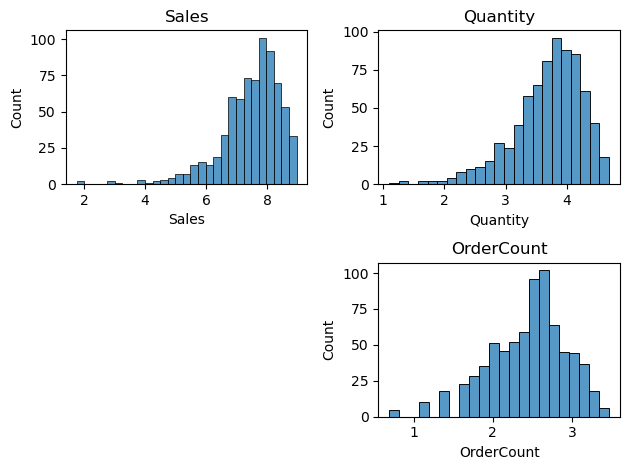

In [16]:
plt.subplot (2 , 2 , 1)
sns.histplot(data = non_outliers['Sales'])
plt.title('Sales')

plt.subplot (2 , 2 , 2)
sns.histplot(data = non_outliers['Quantity'])
plt.title('Quantity')

plt.subplot (2 , 2 , 4)
sns.histplot(data = non_outliers['OrderCount'])
plt.title('OrderCount')
plt.tight_layout()
plt.show()

In [17]:
non_outliers.describe()

,Sales,Quantity,OrderCount
count,739.000000,739.000000,739.000000
mean,7.449310,3.691604,2.456205
std,0.994858,0.573042,0.485377
min,1.763531,1.098612,0.693147
25%,6.967015,3.401197,2.197225
50%,7.679242,3.784190,2.484907
75%,8.100574,4.110874,2.772589
max,8.951921,4.691348,3.465736


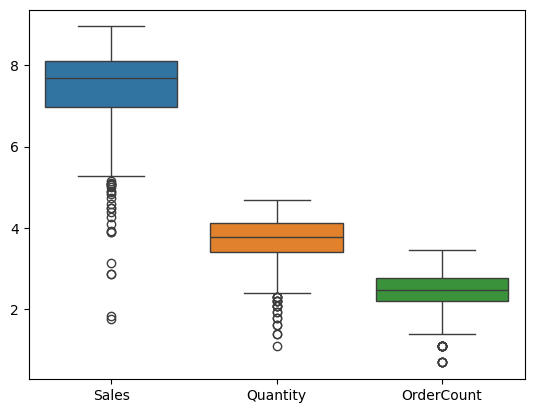

In [18]:
sns.boxplot(data = non_outliers)
plt.show()

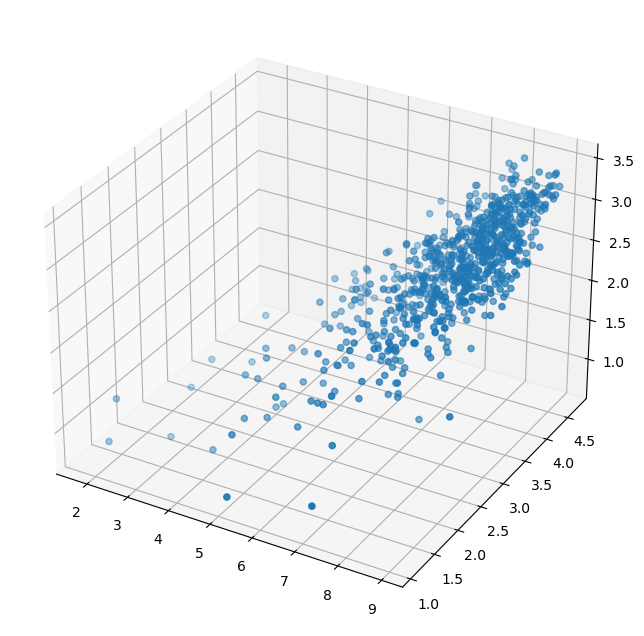

In [19]:
fig = plt.figure(figsize = (8,8) )
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers['Sales'], non_outliers['Quantity'], non_outliers['OrderCount'])
plt.show()

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers[['Sales','Quantity','OrderCount']])
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers.index, columns = ('Sales','Quantity','OrderCount'))
scaled_data_df

,Sales,Quantity,OrderCount
0,1.181735,-0.449864,0.059174
1,-0.488592,0.080443,0.652273
2,0.041748,-0.140898,0.224194
3,1.091666,0.843063,1.006569
4,-0.665157,-1.838014,-1.052049
...,...,...,...
786,1.279905,1.161443,1.006569
788,0.325613,1.612695,1.878352
789,1.161798,-0.394423,-0.533926
790,1.371725,0.673938,0.224194


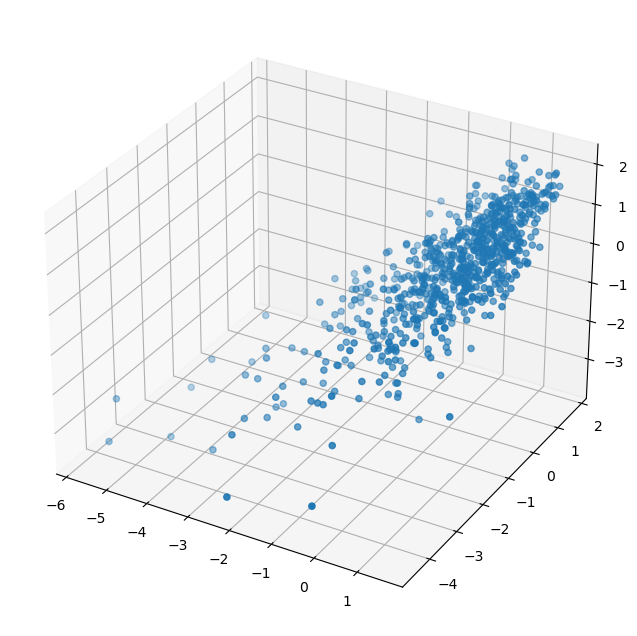

In [21]:
fig = plt.figure(figsize = (8,8) )
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(scaled_data_df['Sales'], scaled_data_df['Quantity'], scaled_data_df['OrderCount'])
plt.show()

C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

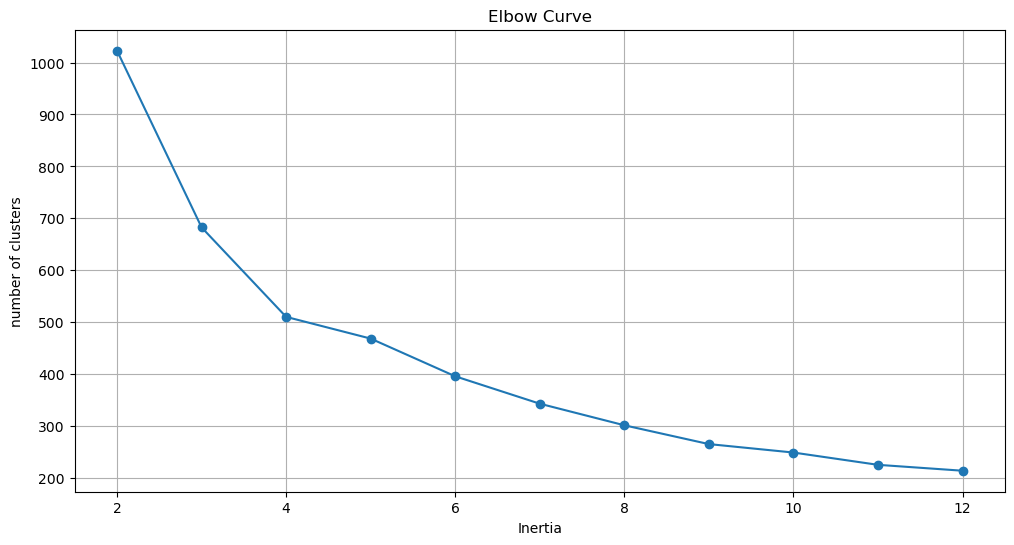

In [22]:
# KMeans Clustering
max_k = 12
inertia = []
k_values = range(2,max_k+1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    kmeans.fit_predict(scaled_data_df)
    
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(k_values,inertia, marker='o')
plt.xlabel("Inertia")
plt.ylabel("number of clusters")
plt.title("Elbow Curve")
plt.grid(True)
plt.show()

C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

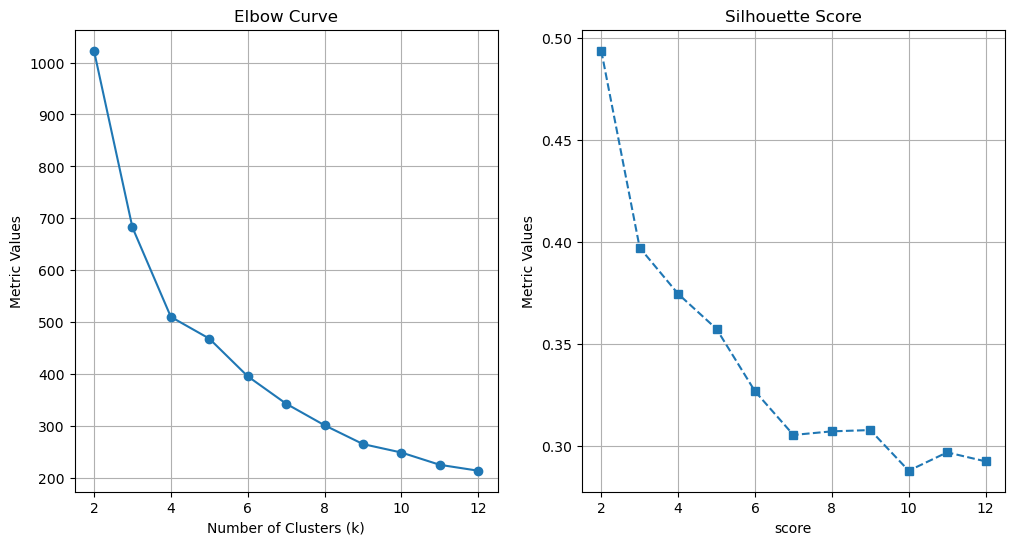

In [23]:
max_k = 12
inertia = []
sil_scores = []  # Store Silhouette scores for comparison
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    # Compute Silhouette Score
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    
    sil_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

# Plot Inertia (Elbow Curve) & Silhouette Scores
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o', label="Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Metric Values")
plt.title("Elbow Curve")
plt.grid(True)




plt.subplot(1,2,2)
plt.plot(k_values, sil_scores, marker='s', linestyle='dashed', label="Silhouette Score")
plt.xlabel("score")
plt.ylabel("Metric Values")
plt.title("Silhouette Score")
plt.grid(True)
plt.show()


In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
non_outliers['cluster'] = cluster_labels
non_outliers.head(5)

C:\Conda5\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Customer ID,Sales,Quantity,OrderCount,cluster
0,AA-10315,8.624173,3.433987,2.484907,2
1,AA-10375,6.963559,3.737670,2.772589,2
2,AA-10480,7.490815,3.610918,2.564949,2
3,AA-10645,8.534627,4.174387,2.944439,0
4,AB-10015,6.788021,2.639057,1.945910,1


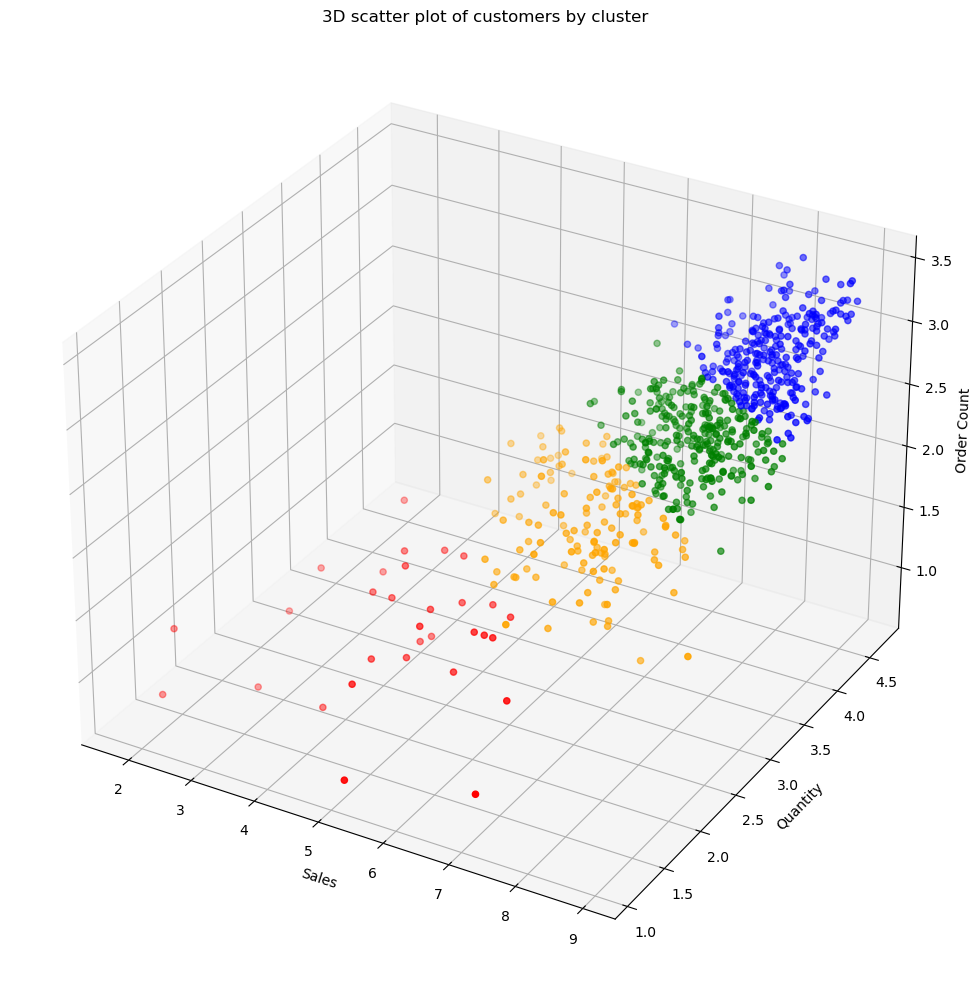

In [25]:
cluster_colors = {0:'b',1:'orange',2:'g',3:'r'}
color = non_outliers['cluster'].map(cluster_colors)

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers['Sales'],non_outliers['Quantity'],non_outliers['OrderCount'],c=color,marker='o')
ax.set_xlabel('Sales')
ax.set_ylabel('Quantity')
ax.set_zlabel('Order Count')
ax.set_title('3D scatter plot of customers by cluster')
plt.tight_layout()
plt.show()

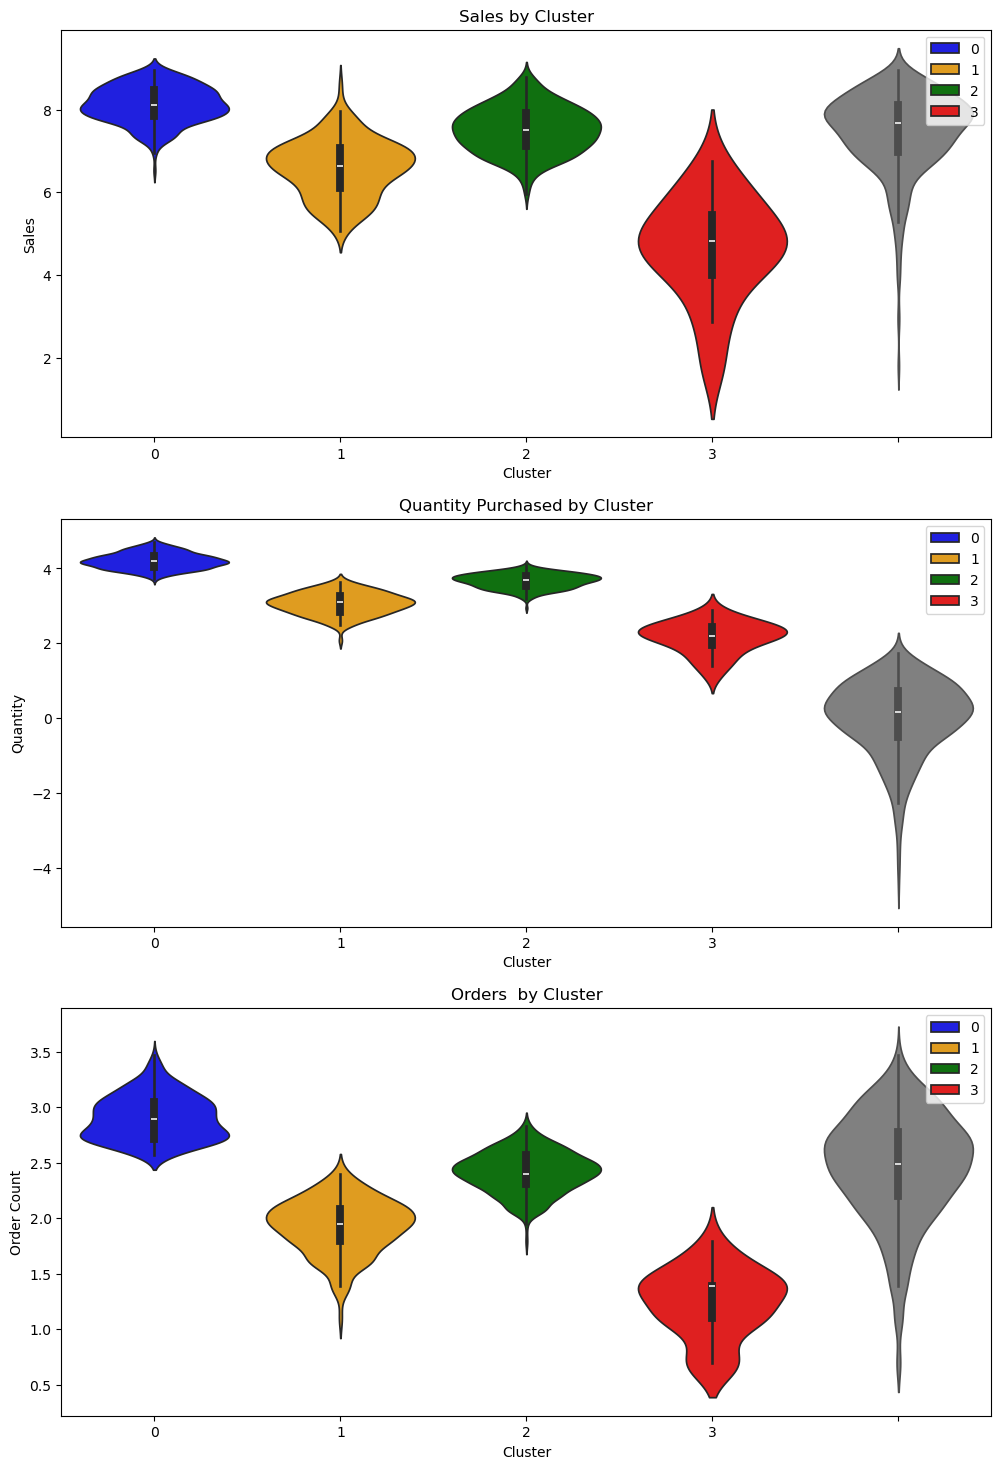

In [26]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers['cluster'],y=non_outliers['Sales'] ,palette=cluster_colors, hue=non_outliers['cluster'])
sns.violinplot(y=non_outliers['Sales'],color = 'gray' )
plt.xlabel('Cluster')
plt.title('Sales by Cluster')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers['cluster'],y=non_outliers['Quantity'] ,palette=cluster_colors, hue=non_outliers['cluster'])
sns.violinplot(y=scaled_data_df['Quantity'],color = 'gray' )
plt.xlabel('Cluster')
plt.title('Quantity Purchased by Cluster')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers['cluster'],y=non_outliers['OrderCount'] ,palette=cluster_colors, hue=non_outliers['cluster'])
sns.violinplot(y=non_outliers['OrderCount'],color = 'gray' )
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.title('Orders  by Cluster')



plt.show()

In [27]:
overlap_index = sales_outliers.index.intersection(quantity_outliers.index)
sales_only_outliers = sales_outliers.drop(overlap_index)
quantity_only_outliers = quantity_outliers.drop(overlap_index)
sales_and_quantity_outliers = sales_outliers.loc[overlap_index]

sales_only_outliers['cluster'] = -1
quantity_only_outliers['cluster'] = -2
sales_and_quantity_outliers['cluster'] = -3

outlier_clusters_df = pd.concat([sales_only_outliers,quantity_only_outliers,sales_and_quantity_outliers])
outlier_clusters_df

,Customer ID,Sales,Quantity,OrderCount,cluster
5,AB-10060,7755.6200,56,18,-1
6,AB-10105,14473.5710,73,20,-1
34,AH-10690,7888.2940,102,23,-1
90,BM-11140,11789.6300,64,16,-1
104,BS-11365,10501.6530,39,9,-1
131,CC-12370,12129.0720,34,11,-1
146,CJ-12010,11164.9740,83,20,-1
152,CL-12565,10880.5460,106,28,-1
160,CM-12385,8954.0200,34,10,-1
234,DR-12940,8350.8680,57,13,-1


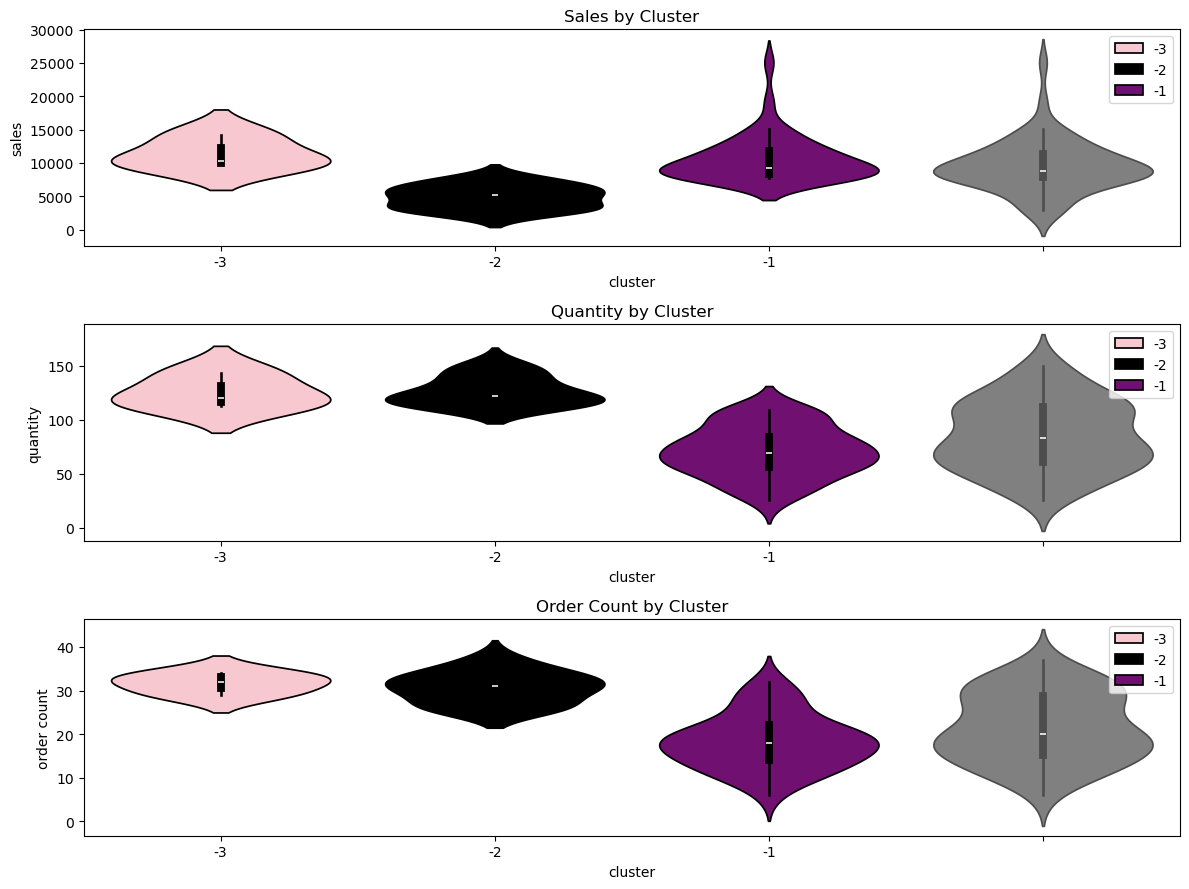

In [28]:
cluster_colors = {-1:'purple',-2:'black',-3:'pink'}

plt.figure(figsize=(12,9))

plt.subplot(3,1,1)
sns.violinplot(x = outlier_clusters_df['cluster'], y = outlier_clusters_df['Sales'], palette = cluster_colors, hue = outlier_clusters_df['cluster'])
sns.violinplot(y = outlier_clusters_df['Sales'], color = 'grey')
plt.title('Sales by Cluster')
plt.ylabel('sales')

plt.subplot(3,1,2)
sns.violinplot(x = outlier_clusters_df['cluster'], y = outlier_clusters_df['Quantity'], palette = cluster_colors, hue = outlier_clusters_df['cluster'])
sns.violinplot(y = outlier_clusters_df['Quantity'], color = 'grey')
plt.title('Quantity by Cluster')
plt.ylabel('quantity')

plt.subplot(3,1,3)
sns.violinplot(x = outlier_clusters_df['cluster'], y = outlier_clusters_df['OrderCount'], palette = cluster_colors, hue = outlier_clusters_df['cluster'])
sns.violinplot(y = outlier_clusters_df['OrderCount'], color = 'grey')
plt.title('Order Count by Cluster')
plt.ylabel('order count')

plt.tight_layout()
plt.show()

In [29]:
cluster_names = {0:'Reward & Retain',1:'Grow & Develop',2:'Engage & Nurture',3:'Re-Engage or Re-Evaluate',-1:'Activate',-2:'Convert',-3:'Maximize'}

In [30]:
full_cluster_df = pd.concat([non_outliers,outlier_clusters_df])
full_cluster_df

,Customer ID,Sales,Quantity,OrderCount,cluster
0,AA-10315,8.624173,3.433987,2.484907,2
1,AA-10375,6.963559,3.737670,2.772589,2
2,AA-10480,7.490815,3.610918,2.564949,2
3,AA-10645,8.534627,4.174387,2.944439,0
4,AB-10015,6.788021,2.639057,1.945910,1
...,...,...,...,...,...
691,SH-19975,3406.839500,113.000000,29.000000,-2
787,WB-21850,6160.102000,146.000000,37.000000,-2
257,EH-13765,10310.880000,120.000000,32.000000,-3
387,JL-15835,9799.923000,143.000000,34.000000,-3


In [31]:
full_cluster_df.isna().sum()

Customer ID    0
Sales          0
Quantity       0
OrderCount     0
cluster        0
dtype: int64

In [32]:
cluster_names = {0:'Retain',1:'Improve',2:'devolop',3:'Upsell',-3:'Cultivate',-2:'Activate',-1:'Maximise'} 

In [36]:
full_cluster_df['cluster_name']=full_cluster_df['cluster'].map(cluster_names)
full_cluster_df.head()

,Customer ID,Sales,Quantity,OrderCount,cluster,cluster_name
0,AA-10315,8.624173,3.433987,2.484907,2,devolop
1,AA-10375,6.963559,3.737670,2.772589,2,devolop
2,AA-10480,7.490815,3.610918,2.564949,2,devolop
3,AA-10645,8.534627,4.174387,2.944439,0,Retain
4,AB-10015,6.788021,2.639057,1.945910,1,Improve


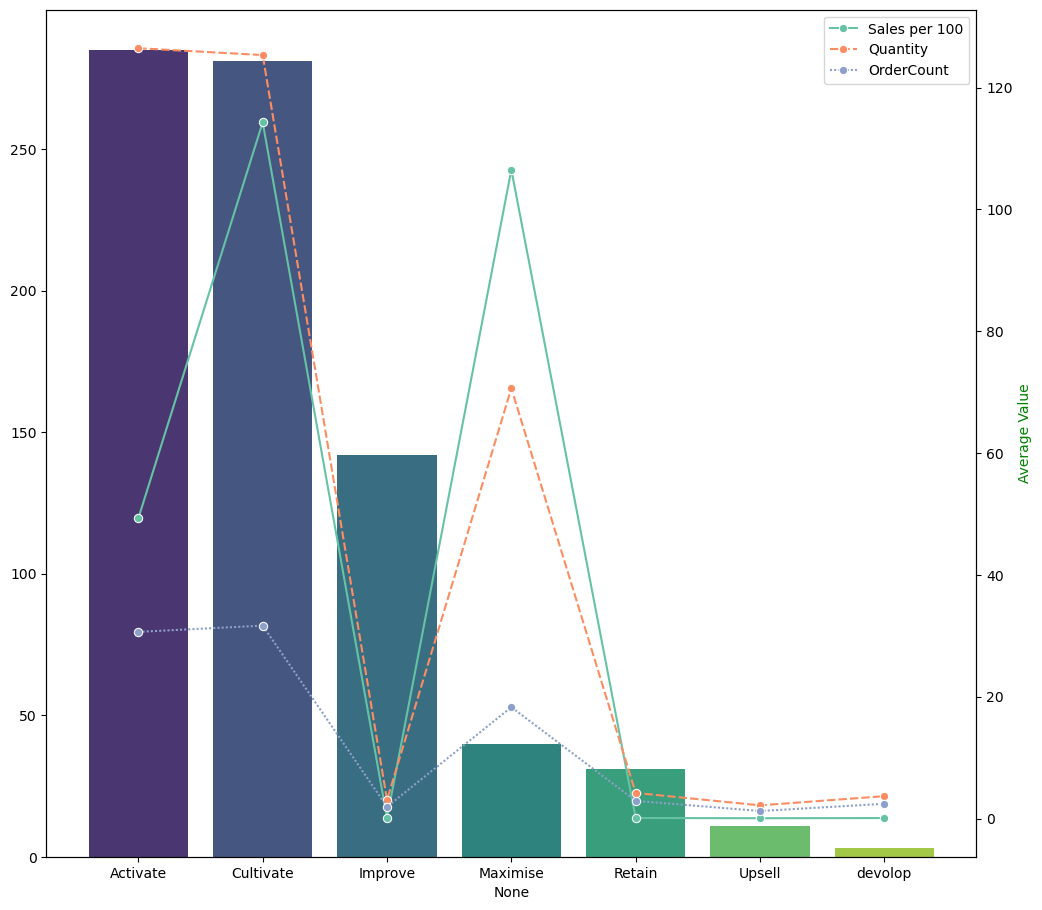

In [42]:
cluster_counts = full_cluster_df['cluster_name'].value_counts()
full_cluster_df['Sales per 100'] = full_cluster_df['Sales']/100
feature_means = full_cluster_df.groupby('cluster_name')[['Sales per 100','Quantity','OrderCount']].mean()

fig, ax1 = plt.subplots(figsize = (12,11))

sns.barplot(x = cluster_counts.index, y=cluster_counts.values, ax = ax1, palette = 'viridis', hue = cluster_counts.index, linewidth = 2)
ax.set_ylabel('Number of customers', color = 'b')
ax.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data = feature_means, ax = ax2, palette = 'Set2', marker = 'o')
ax2.set_ylabel('Average Value', color = 'g')

plt.show()